In [1]:
%load_ext autoreload

In [10]:
%autoreload 2
import matplotlib
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import _init_paths
from easydict import EasyDict as edict
import copy
from block_gen import block_gen as bg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sim_knn import sim_knn as sim_knn
from label_denoising import label_denoising as ld
from mpl_toolkits.mplot3d import axes3d, Axes3D 
from root_sim import root_sim as rs
from root_sim.root_sim import experiment_setup
from base.utils import *

# Graph Sampling Overview

![Graph Summary](/home/kent/Documents/experiments/label_smoothing_simulation/report/figs/graph_sampling_overview.png)

- A: The *values* of the graph are set to $\{0,1\}$
- B: The *size of the graph* (number of vertices) shrinks to $\widetilde{N}$.

# Measure Naive Label Denoising Quality

# Initialize Experiments

### default simulation parameters

In [9]:
# default simulation parameters
cfg = edict({})

cfg.binary_threshold= 0.5

cfg.basegrid = edict({})
cfg.basegrid.size = 100
cfg.basegrid.random = True
cfg.basegrid.nclasses = 3
cfg.basegrid.label_noise = 0.25
cfg.basegrid.bg_grid_noise = 0.25
cfbg = cfg.basegrid

cfg.knn = edict({})
cfg.knn.target = 3
cfg.knn.k = 10
cfk = cfg.knn

cfg.subsample = edict({})
cfg.subsample.method = 'bernoulli'
cfg.subsample.sort = False
cfs = cfg.subsample

default_cfg = copy.deepcopy(cfg)

### init  simulation data

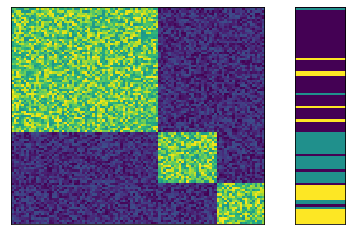

In [4]:
exp_data = experiment_setup(cfg)
fig,ax = bg.plot_blockgrid(exp_data.base.grid,exp_data.base.labels)

# One-off Experiments (see how the loops will run)

### Maximum Vote Method on the Base Grid (aka all the data)

Accuracy of 100.00%


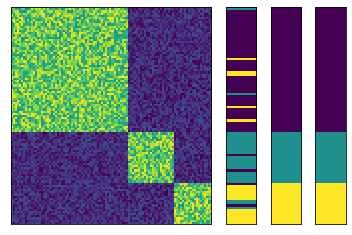

In [5]:
base = exp_data.base
grid,labels,gt = base.grid,base.labels,base.gt
guess = ld.maximum_vote(grid,labels)
fig,ax = bg.plot_blockgrid(grid,labels,gt,guess)
acc = 100 * np.sum(guess == gt)/len(gt)
print("Accuracy of {:.2f}%".format(acc))

## Maximum Vote Method on Subgrid (randomly subsampled grid)

Accuracy of 100.00%


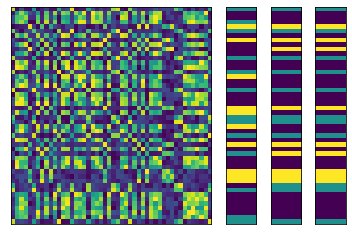

In [7]:
subset = exp_data.subset
grid,labels,gt = subset.grid,subset.labels,subset.gt
guess = ld.maximum_vote(grid,labels)
fig,ax = bg.plot_blockgrid(grid,labels,gt,guess)
acc = 100 * np.sum(guess == gt)/len(gt)
print("Accuracy of {:.2f}%".format(acc))

## Maximum Vote Method on Binary-Threshold Subgrid (randomly subsampled grid)

Accuracy of 100.00%


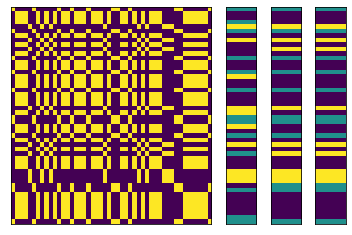

In [37]:
subset = exp_data.subset
grid,labels,gt = subset.grid,subset.labels,subset.gt
bgrid = np_binarize(grid,threshold=cfg.binary_threshold)
guess = ld.maximum_vote(bgrid,labels)
fig,ax = bg.plot_blockgrid(bgrid,labels,gt,guess)
acc = 100 * np.sum(guess == gt)/len(gt)
print("Accuracy of {:.2f}%".format(acc))

## Maximum Vote Method on  Binary-Beroulli Grid 

Each value $[G]_{ij} \in \{0,1\}$ with probability $[G]_{ij}$

Accuracy of 99.00%


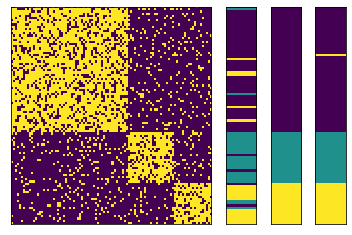

In [54]:
p = exp_data.base
grid,labels,gt = p.grid,p.labels,p.gt
bgrid = bg.binarize_grid_bernoulli(grid)
guess = ld.maximum_vote(bgrid,labels)
fig,ax = bg.plot_blockgrid(bgrid,labels,gt,guess)
acc = 100 * np.sum(guess == gt)/len(gt)
print("Accuracy of {:.2f}%".format(acc))

## Maximum Vote KNN Method on Real-valued Grid

Accuracy of 99.00%


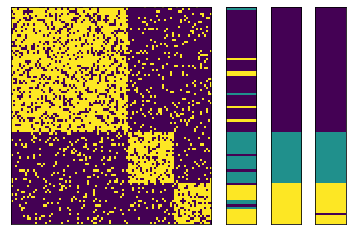

In [51]:
p = exp_data.base
grid,labels,gt = p.grid,p.labels,p.gt
guess = ld.maximum_vote_knn(grid,labels,cfg.knn.k)
fig,ax = bg.plot_blockgrid(bgrid,labels,gt,guess)
acc = 100 * np.sum(guess == gt)/len(gt)
print("Accuracy of {:.2f}%".format(acc))

## Maximum Vote KNN Method on Binary-Beroulli Grid 

Accuracy of 91.00%


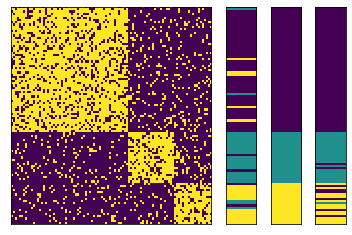

In [36]:
guess = ld.maximum_vote_knn(bgrid,labels,cfg.knn.k)
fig,ax = bg.plot_blockgrid(bgrid,labels,gt,guess)
acc = 100 * np.sum(guess == gt)/len(gt)
print("Accuracy of {:.2f}%".format(acc))